# Data Preprocessing

In [83]:
pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ASUS\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.9.24  |       h5b45459_0         189 KB  conda-forge
    certifi-2022.9.24          |     pyhd8ed1ab_0         155 KB  conda-forge
    conda-22.9.0               |   py39hcbf5309_1         968 KB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    openssl-1.1.1q             |       h8ffe710_0         5.8 MB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         7.2 MB

The following NEW packages will 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.impute import SimpleImputer
from scipy import stats

In [4]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')

In [5]:
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
3753,53754,0,3.0,Mobile Phone,3,26.0,Debit Card,Male,4.0,5,Laptop & Accessory,3,Married,3,0,15.0,2.0,2.0,NaN,211.20
1683,51684,0,3.0,Mobile Phone,3,11.0,E wallet,Female,1.0,4,Laptop & Accessory,3,Married,2,0,13.0,1.0,1.0,2.0,161.18
3119,53120,0,20.0,Mobile Phone,1,9.0,Debit Card,Male,3.0,4,Grocery,3,Divorced,8,0,NaN,1.0,2.0,2.0,303.61
4900,54901,0,9.0,Mobile Phone,1,17.0,UPI,Male,3.0,4,Mobile Phone,1,Married,3,0,21.0,1.0,2.0,3.0,164.17
2817,52818,1,1.0,Phone,1,31.0,Debit Card,Male,3.0,5,Mobile Phone,3,Single,7,1,15.0,1.0,2.0,4.0,145.28


# 1. Data Cleansing

### Menghapus column Customer ID

In [7]:
df1 = df.copy()
df1.drop('CustomerID', axis = 1, inplace = True)

In [8]:
df1.sample(5)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2861,1,1.0,Computer,3,7.0,COD,Female,4.0,6,Mobile Phone,5,Single,2,0,22.0,2.0,2.0,1.0,148.25
4509,0,3.0,Computer,3,9.0,Debit Card,Male,4.0,4,Laptop & Accessory,3,Married,3,0,15.0,2.0,2.0,3.0,171.49
2816,1,1.0,Phone,1,9.0,UPI,Male,4.0,5,Mobile Phone,3,Single,8,1,16.0,1.0,2.0,1.0,145.90
2168,0,2.0,Computer,1,16.0,Debit Card,Female,3.0,3,Mobile,4,Married,1,0,14.0,0.0,1.0,1.0,132.91
5528,0,8.0,Computer,1,29.0,UPI,Male,3.0,5,Laptop & Accessory,1,Married,3,1,16.0,4.0,7.0,12.0,182.47


In [9]:
#pengelompokan
cats = ['Churn','CityTier','PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','Complain']
nums = ['Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress'
            ,'OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

### Merge Value Ganda

In [11]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df1[col].value_counts())
    print()

Value count kolom Churn:
0    4682
1     948
Name: Churn, dtype: int64

Value count kolom CityTier:
1    3666
3    1722
2     242
Name: CityTier, dtype: int64

Value count kolom PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Value count kolom PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value count kolom PreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count kolom MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64


In [12]:
df2 = df1.copy()

In [13]:
df2.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df2.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'
df2.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'
df2.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

In [14]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df2[col].value_counts())
    print()

Value count kolom Churn:
0    4682
1     948
Name: Churn, dtype: int64

Value count kolom CityTier:
1    3666
3    1722
2     242
Name: CityTier, dtype: int64

Value count kolom PreferredLoginDevice:
Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

Value count kolom PreferredPaymentMode:
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value count kolom PreferedOrderCat:
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count kolom MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64

Value count kolom Complain:
0    4026
1    1604
Name: Complain, dtype: int64



## A. Handling Missing Value

In [15]:
df2.isna().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [16]:
sum_missing = df.isna().sum()
percent_missing = round(df.isnull().sum() * 100 / len(df),2)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'sum_missing': sum_missing,
                                 'percent_missing': percent_missing}).reset_index(drop=True)
missing_value_df

,column_name,sum_missing,percent_missing
0,CustomerID,0,0.00
1,Churn,0,0.00
2,Tenure,264,4.69
3,PreferredLoginDevice,0,0.00
4,CityTier,0,0.00
5,WarehouseToHome,251,4.46
6,PreferredPaymentMode,0,0.00
7,Gender,0,0.00
8,HourSpendOnApp,255,4.53
9,NumberOfDeviceRegistered,0,0.00


In [17]:
print(f'The number of missing values: {df.isnull().sum().sum()}')
print(f'The number of rows with missing values: {df[df.isnull().any(axis=1)].shape[0]}')

The number of missing values: 1856
The number of rows with missing values: 1856


### Treatment apa yang tepat untuk missing Values
Total ada 1.856 missing values, dan juga ada 1.856 rows dengan missing values, artinya setiap missing values berada pada row yang berbeda, dan tidak ada rows yang memiliki lebih dari satu missing values.
<br>
Jadi jika kita drop semua rows dengan missing values, kita akan membuang 1856 rows atau 32,97 persen dari dataset dan akan menyebabkan data loss, sehingga treatment yang paling tepat adalah dengan imputation

In [18]:
df3 = df2.copy()
imputer = SimpleImputer(strategy= 'median')      
imputer.fit(df3[nums])
df3[nums] = imputer.transform(df3[nums])

In [20]:
df3.isna().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

## B. Handling Outliers

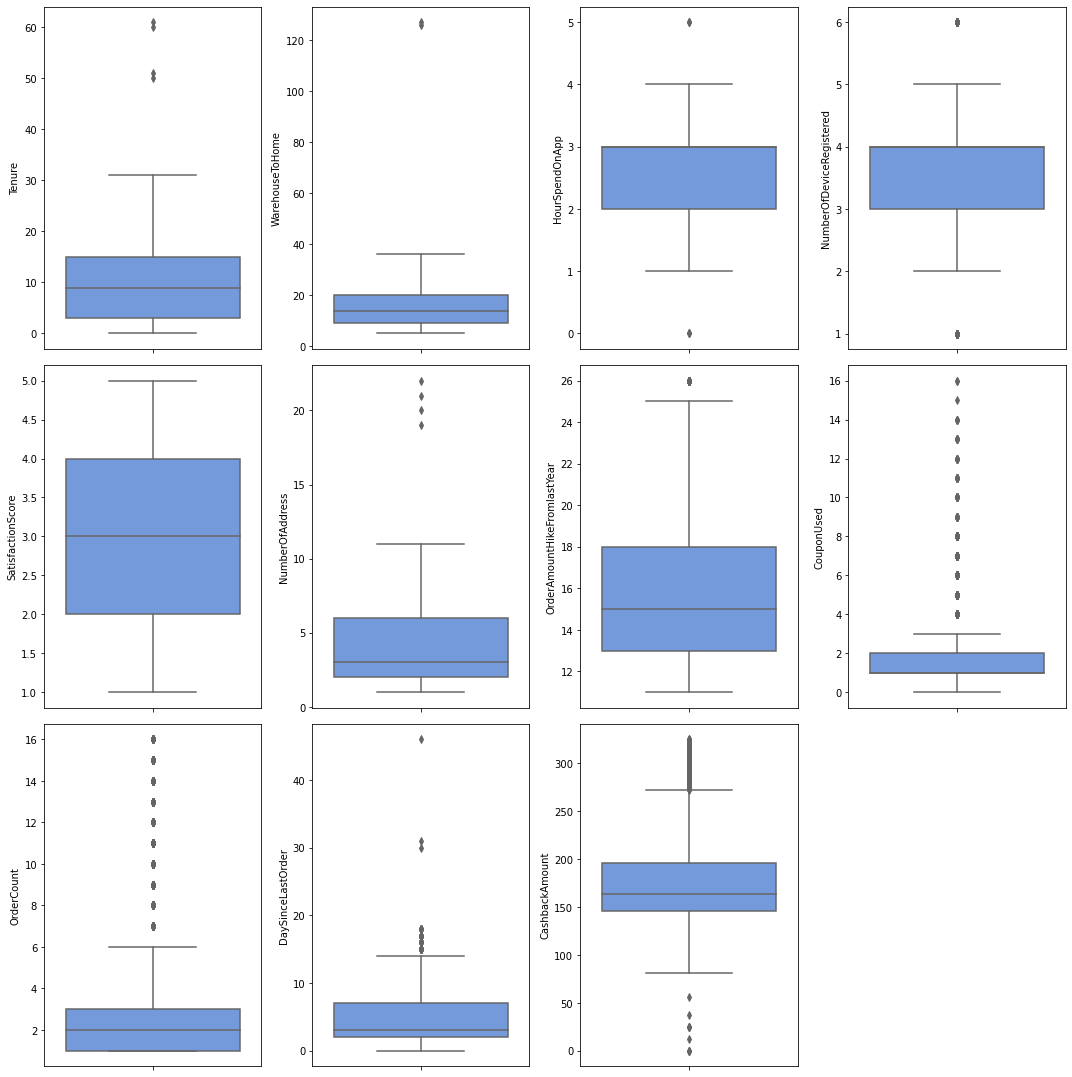

In [21]:
plt.figure(figsize=(15,20))
for i in range(0, len(nums)):
  plt.subplot(4, 4, i+1)
  sns.boxplot(y=df3[nums[i]], color='cornflowerblue', orient='v')
  plt.tight_layout()

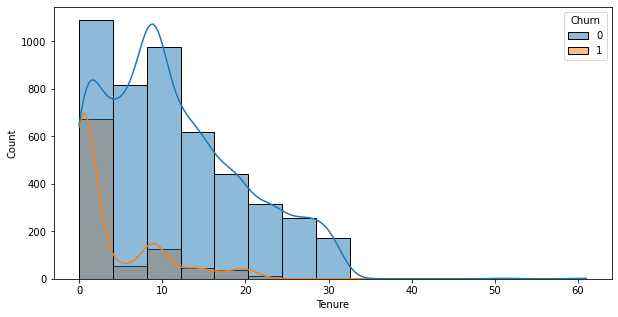

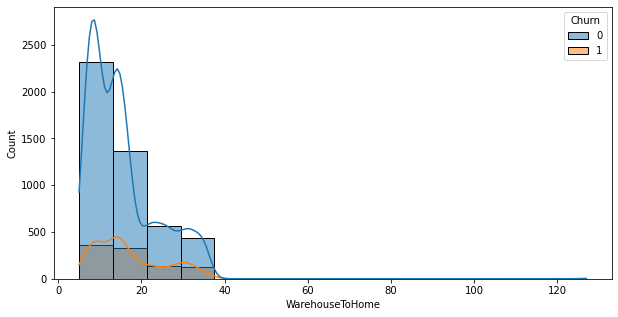

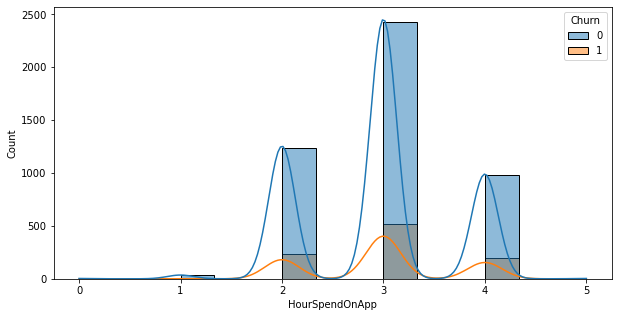

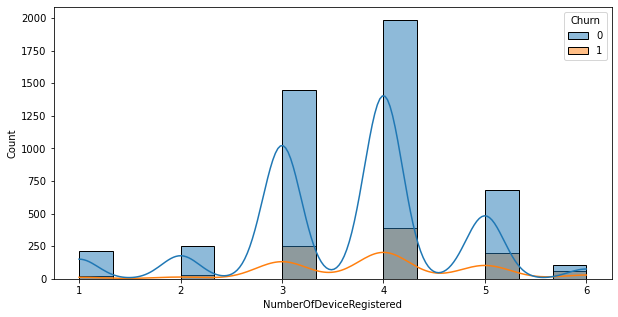

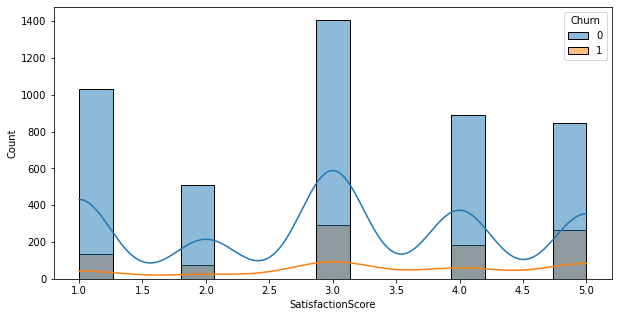

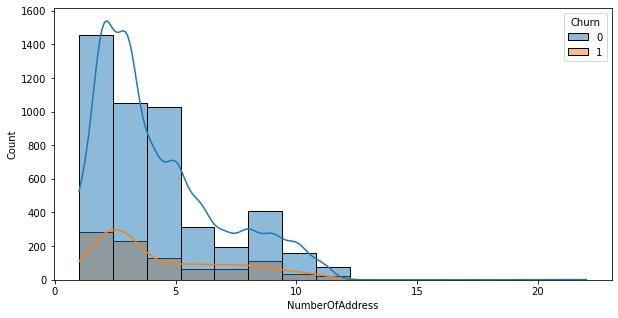

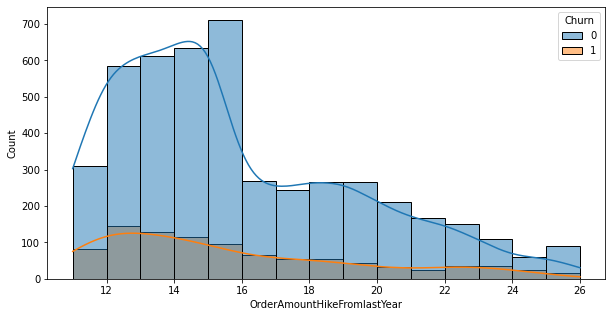

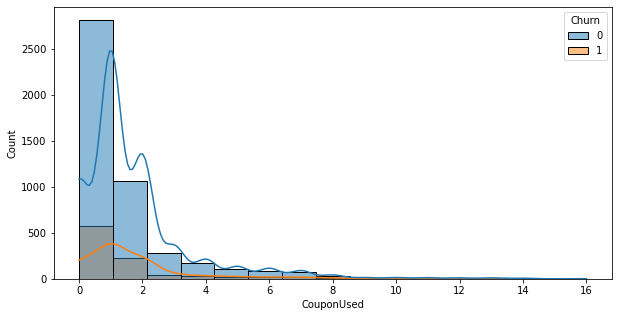

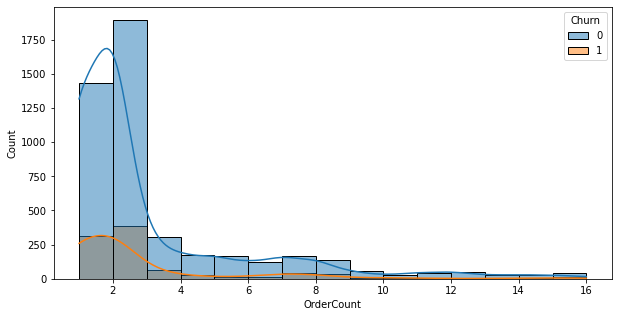

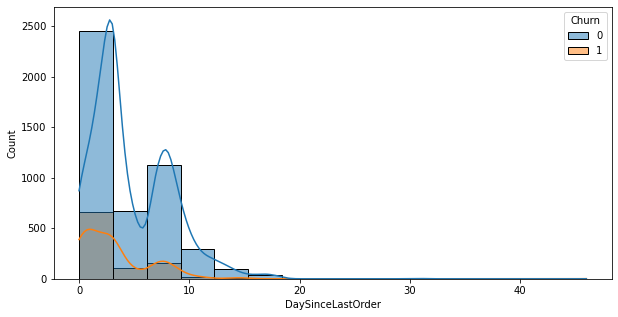

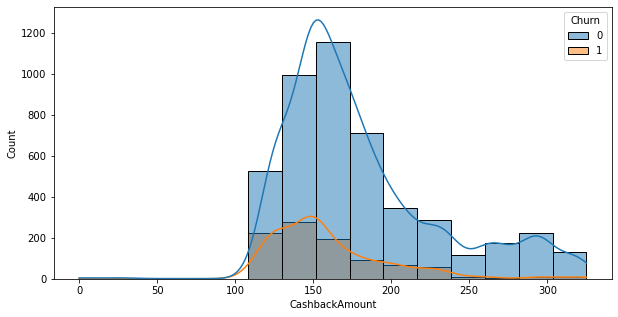

In [22]:
for i in nums:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df3, x=i, kde= True, bins= 15, hue='Churn')
    plt.show()

In [23]:
df4 = df3.copy()

In [24]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df4)}')

filtered_entries = np.array([True] * len(df4))

for col in nums:
    zscore = abs(stats.zscore(df4[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
df4 = df4[filtered_entries] 

print(f'Jumlah baris setelah memfilter outlier: {len(df4)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 5350


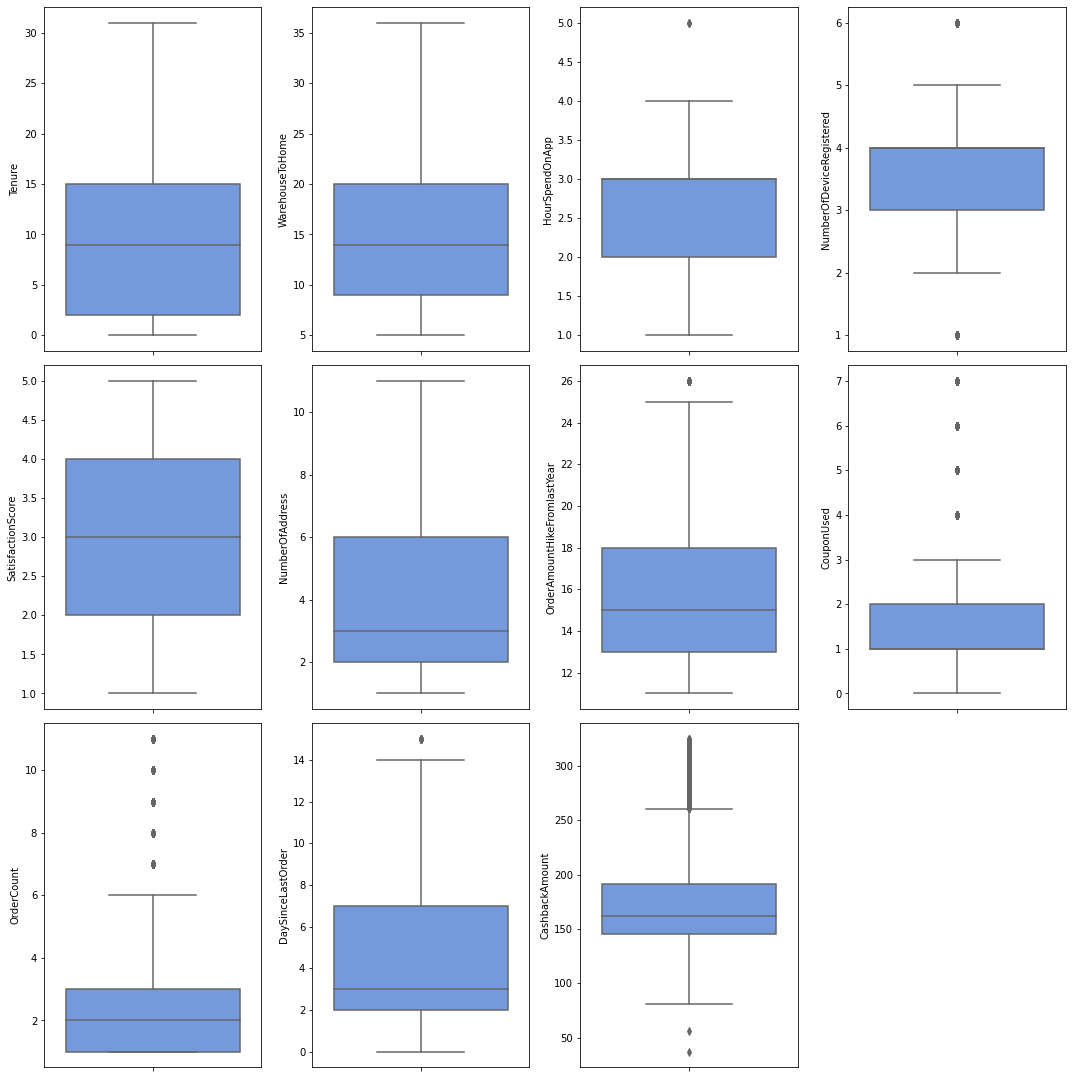

In [25]:
plt.figure(figsize=(15,20))
for i in range(0, len(nums)):
  plt.subplot(4, 4, i+1)
  sns.boxplot(y=df4[nums[i]], color='cornflowerblue', orient='v')
  plt.tight_layout()

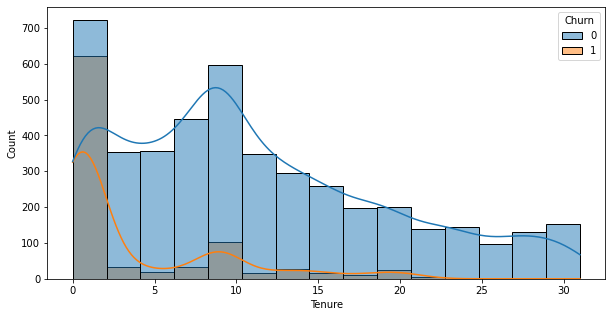

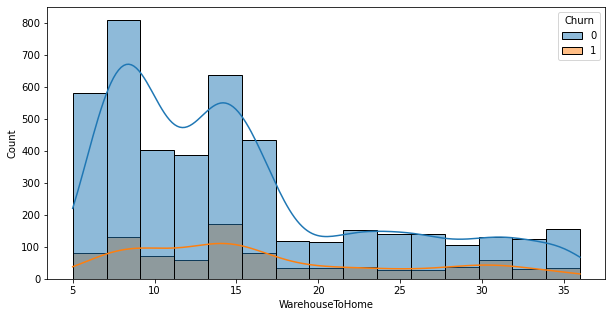

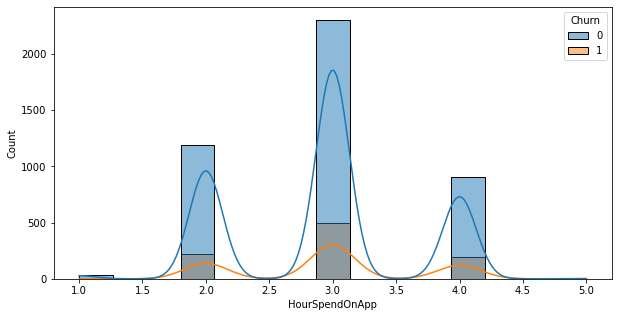

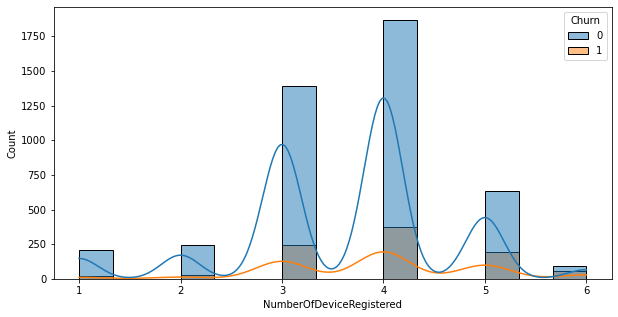

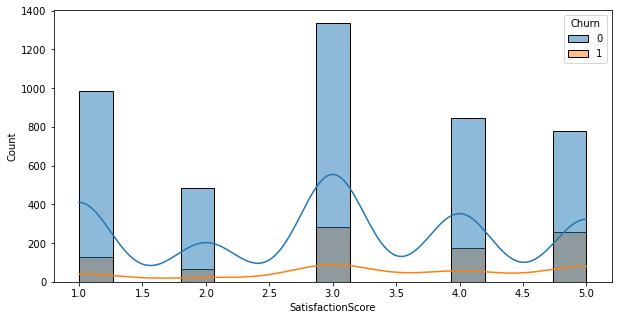

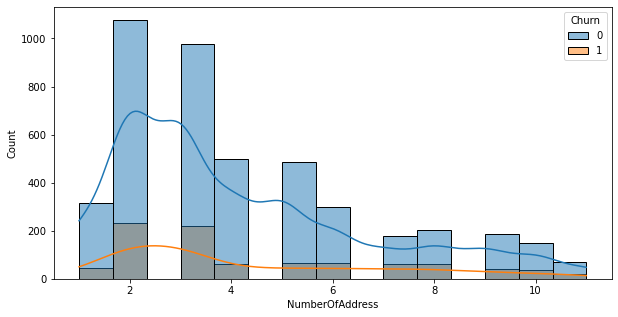

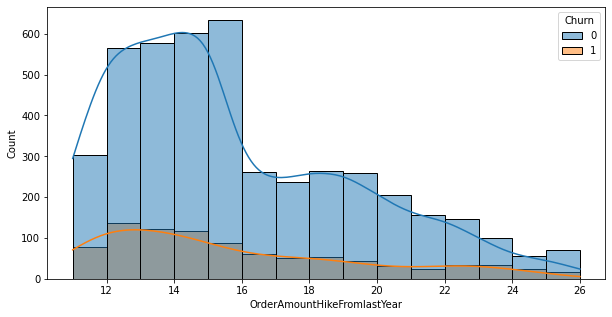

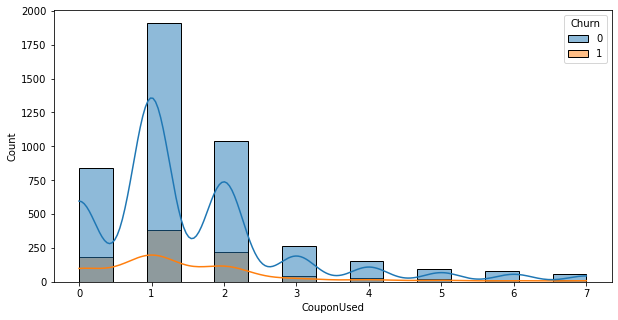

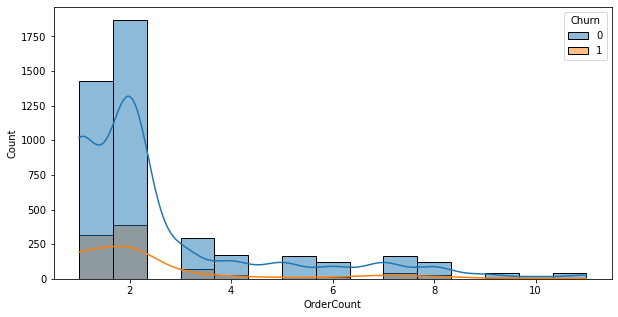

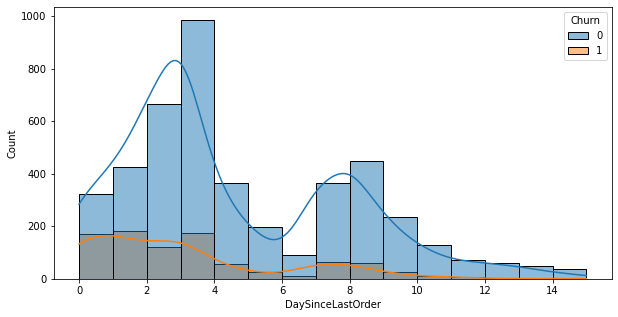

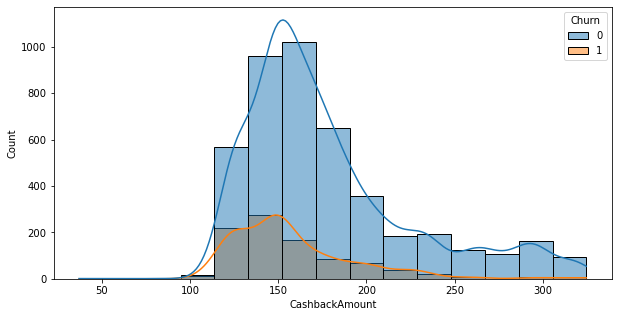

In [26]:
for i in nums:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df4, x=i, kde= True, bins= 15, hue='Churn')
    plt.show()

## C. Feature Transformation

In [27]:
df4[nums]

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.0,6.0,3.0,3.0,2.0,9.0,11.0,1.0,1.0,5.0,159.93
1,9.0,8.0,3.0,4.0,3.0,7.0,15.0,0.0,1.0,0.0,120.90
2,9.0,30.0,2.0,4.0,3.0,6.0,14.0,0.0,1.0,3.0,120.28
3,0.0,15.0,2.0,4.0,5.0,8.0,23.0,0.0,1.0,3.0,134.07
4,0.0,12.0,3.0,3.0,5.0,3.0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...
5625,10.0,30.0,3.0,2.0,1.0,6.0,18.0,1.0,2.0,4.0,150.71
5626,13.0,13.0,3.0,5.0,5.0,6.0,16.0,1.0,2.0,3.0,224.91
5627,1.0,11.0,3.0,2.0,4.0,3.0,21.0,1.0,2.0,4.0,186.42
5628,23.0,9.0,4.0,5.0,4.0,4.0,15.0,2.0,2.0,9.0,178.90


In [28]:
df5 = df4.copy()

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df5[nums])
df5[nums] = scaler.transform(df5[nums])

In [30]:
df5.sample(5)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
3127,0,0.129032,Mobile Phone,3,0.290323,E wallet,Male,0.50,0.6,Mobile Phone,0.75,Single,0.1,0,0.266667,0.285714,0.1,0.200000,0.409516
4482,0,0.193548,Mobile Phone,1,0.129032,Credit Card,Female,0.75,0.2,Laptop & Accessory,0.00,Single,0.8,0,0.400000,0.142857,0.1,0.533333,0.481528
3934,0,0.129032,Computer,1,0.129032,Cash on Delivery,Female,0.75,0.8,Mobile Phone,1.00,Single,0.1,0,0.400000,0.142857,0.1,0.533333,0.478504
1019,0,0.129032,Computer,3,0.096774,UPI,Male,0.25,0.4,Laptop & Accessory,1.00,Single,0.7,0,0.133333,0.000000,0.0,0.200000,0.404268
2760,0,0.290323,Computer,1,0.064516,Credit Card,Male,0.25,0.6,Mobile Phone,0.50,Married,0.1,0,0.066667,0.000000,0.0,0.000000,0.288743


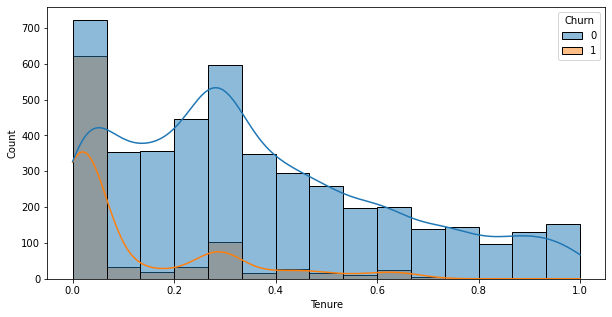

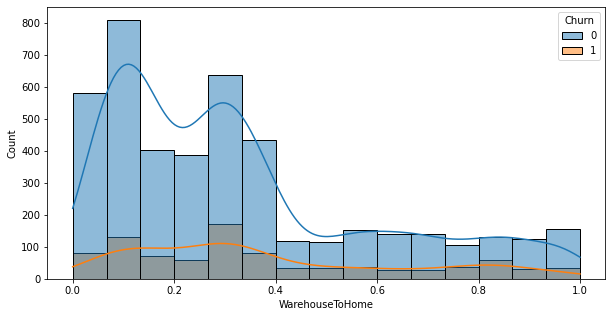

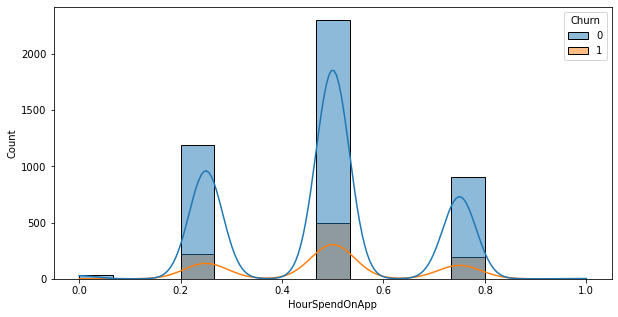

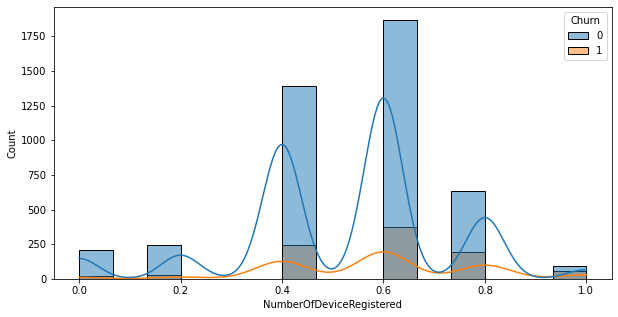

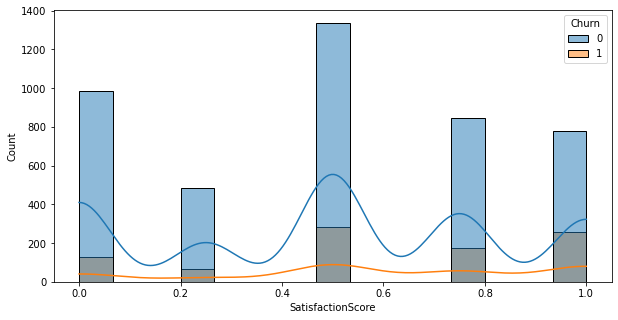

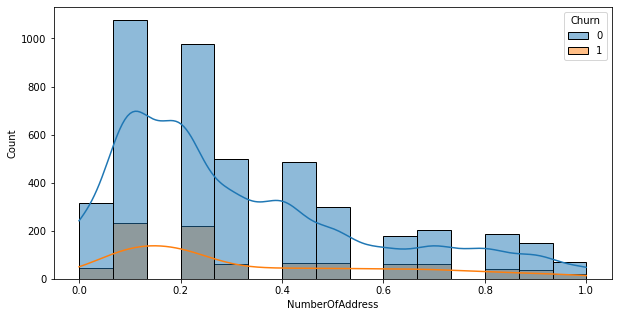

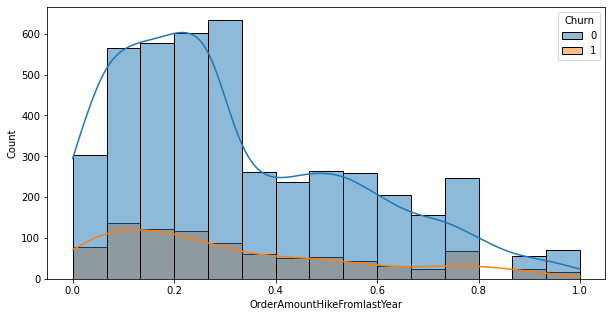

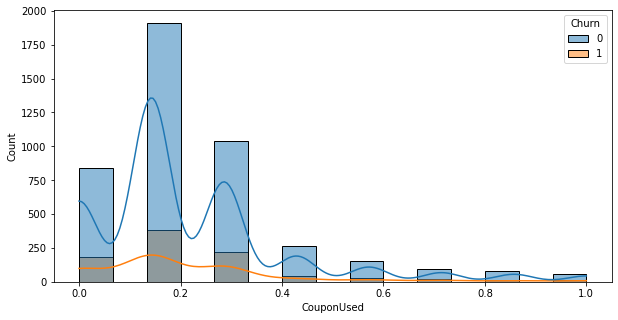

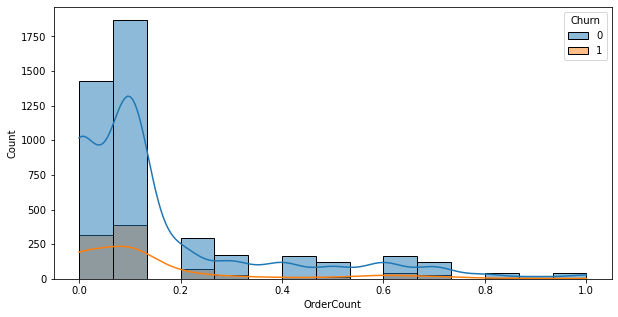

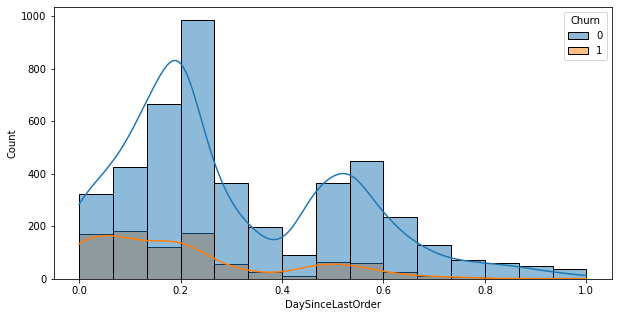

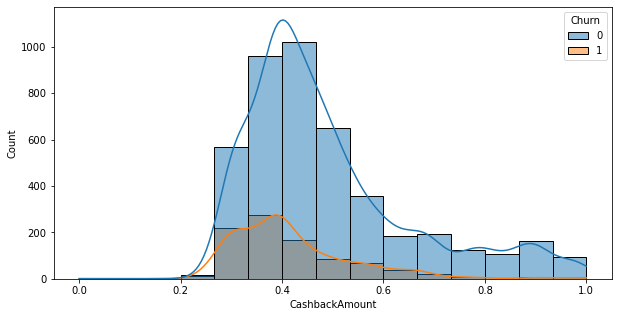

In [31]:
for i in nums:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df5, x=i, kde= True, bins= 15, hue='Churn')
    plt.show()

<AxesSubplot:xlabel='Tenure', ylabel='Density'>

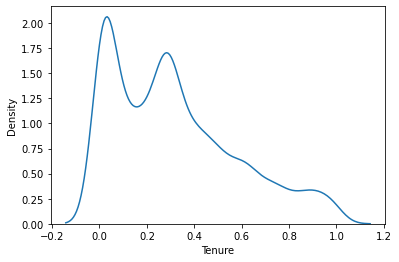

In [32]:
sns.kdeplot(df5['Tenure'])

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='Tenure', ylabel='Density'>

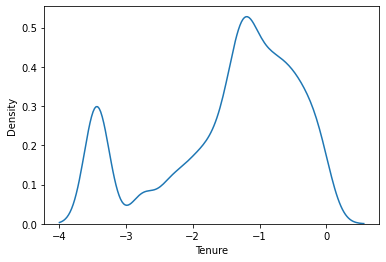

In [33]:
sns.kdeplot(np.log(df5['Tenure']))

In [34]:
df5_2 = df4.copy()

In [35]:
from sklearn.preprocessing import StandardScaler
df5_2['Tenure_std'] = StandardScaler().fit_transform(df5_2['Tenure'].values.reshape(len(df5_2), 1))

In [36]:
df5_2.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_std
count,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5.350000e+03
mean,0.170467,9.804112,1.652710,15.541308,2.929720,3.675140,3.056449,4.196449,0.286355,15.661869,1.522243,2.558692,4.231963,174.579836,1.908287e-16
std,0.376078,8.178609,0.913816,8.066006,0.701942,1.026057,1.378802,2.544520,0.452100,3.574000,1.411624,2.084810,3.270366,46.530132,1.000093e+00
min,0.000000,0.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,37.000000,-1.198863e+00
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.340000,-9.542994e-01
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,161.420000,-9.832813e-02
75%,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,191.520000,6.353615e-01
max,1.000000,31.000000,3.000000,36.000000,5.000000,6.000000,5.000000,11.000000,1.000000,26.000000,7.000000,11.000000,15.000000,324.730000,2.591867e+00


In [37]:
df5_norm = df4.copy()

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df5_norm[nums])
df5_norm[nums] = scaler.transform(df5_norm[nums])

In [39]:
df5_norm.sample(5)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2700,0,0.290323,Mobile Phone,3,0.580645,E wallet,Male,0.25,0.6,Laptop & Accessory,0.75,Married,0.2,0,0.333333,0.142857,0.0,0.200000,0.410350
4862,0,0.129032,Mobile Phone,3,0.322581,UPI,Male,0.75,0.6,Fashion,0.50,Married,0.6,0,0.066667,0.428571,0.7,0.533333,0.558301
1050,0,0.387097,Mobile Phone,1,0.419355,Credit Card,Male,0.50,0.4,Laptop & Accessory,0.75,Married,0.4,0,0.666667,0.142857,0.0,0.000000,0.402982
2778,0,0.000000,Mobile Phone,3,0.290323,UPI,Female,0.25,0.4,Laptop & Accessory,0.50,Married,0.0,1,0.733333,0.000000,0.0,0.266667,0.389497
4964,0,0.709677,Computer,1,0.064516,Credit Card,Male,0.50,0.2,Grocery,0.00,Single,0.3,0,0.266667,0.142857,0.2,0.133333,0.892677


## D. Feature Encoding

In [40]:
cats_data = df5_norm.select_dtypes(include='object')
cats_data

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Mobile Phone,UPI,Male,Mobile Phone,Single
2,Mobile Phone,Debit Card,Male,Mobile Phone,Single
3,Mobile Phone,Debit Card,Male,Laptop & Accessory,Single
4,Mobile Phone,Credit Card,Male,Mobile Phone,Single
...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married
5626,Mobile Phone,Credit Card,Male,Fashion,Married
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
5628,Computer,Credit Card,Male,Laptop & Accessory,Married


In [41]:
encoded = pd.get_dummies(cats_data,drop_first=True)

data_enc = pd.concat([df5_norm.drop(cats_data.columns, axis=1), encoded], axis=1)

In [42]:
data_enc.sample(5)

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
880,0,0.064516,2,0.580645,0.25,0.6,1.00,0.1,0,0.133333,...,0,0,1,1,0,0,0,0,0,1
1721,0,0.774194,3,0.483871,0.25,0.4,0.00,0.4,0,0.000000,...,1,0,0,0,0,1,0,0,1,0
39,0,0.000000,1,0.290323,0.50,0.6,0.50,0.1,1,0.266667,...,0,0,0,1,0,0,1,0,1,0
1525,0,0.129032,1,0.419355,0.50,0.4,0.00,0.8,1,0.800000,...,0,0,0,0,0,0,1,0,1,0
241,1,0.129032,3,0.161290,0.25,0.4,0.75,0.1,0,0.466667,...,0,1,0,1,0,1,0,0,0,1


## E. Imbalance Class

In [43]:
df6 = data_enc.copy()

In [44]:
df6.sample(5)

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
2683,1,0.000000,3,0.322581,0.25,0.4,0.00,0.1,0,0.133333,...,0,0,0,1,0,0,1,0,0,1
1781,1,0.000000,1,0.354839,0.25,0.8,0.00,0.7,0,0.133333,...,0,0,0,1,0,0,1,0,1,0
4405,0,0.161290,1,0.161290,0.75,0.6,0.50,1.0,0,0.133333,...,0,0,0,1,0,0,0,0,1,0
5389,0,0.451613,1,0.322581,0.75,0.6,1.00,0.3,1,0.400000,...,1,0,0,0,0,1,0,0,1,0
2978,1,0.032258,1,0.580645,0.50,0.6,0.75,0.3,1,0.200000,...,0,0,0,1,0,0,1,0,1,0


In [45]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Churn                                5350 non-null   int64  
 1   Tenure                               5350 non-null   float64
 2   CityTier                             5350 non-null   int64  
 3   WarehouseToHome                      5350 non-null   float64
 4   HourSpendOnApp                       5350 non-null   float64
 5   NumberOfDeviceRegistered             5350 non-null   float64
 6   SatisfactionScore                    5350 non-null   float64
 7   NumberOfAddress                      5350 non-null   float64
 8   Complain                             5350 non-null   int64  
 9   OrderAmountHikeFromlastYear          5350 non-null   float64
 10  CouponUsed                           5350 non-null   float64
 11  OrderCount                    

In [46]:
x = df6.drop(columns=['Churn'])
y = df6['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [91]:
conda update conda -y && conda update python -y

^C

Note: you may need to restart the kernel to use updated packages.


In [49]:
from imblearn import over_sampling
x_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(x, y)
x_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(x, y)

C:\Users\ASUS\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "
C:\Users\ASUS\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [51]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    4438
1     912
Name: Churn, dtype: int64


OVERSAMPLING
0    4438
1    2219
Name: Churn, dtype: int64


SMOTE
0    4438
1    2219
Name: Churn, dtype: int64


# 2. Feature Engineering
## A. Feature Selection

In [52]:
df_corr = df6.corr()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_46568\1787243237.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df5_norm.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Correlation Heatmap')

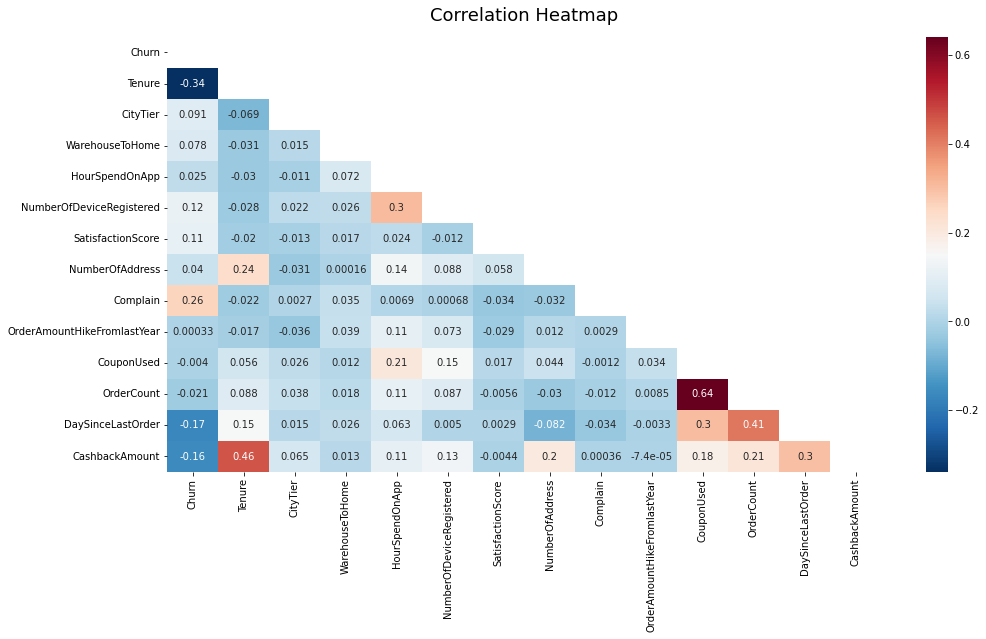

In [56]:
plt.figure(figsize=(16, 8))

mask = np.triu(np.ones_like(df5_norm.corr(), dtype=np.bool))

heatmap = sns.heatmap(df5_norm.corr(), mask=mask, annot=True, cmap='RdBu_r' )
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

## B. Feature Extraction